In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import psColor, bwLabel
import os

TRAIN_DIR = os.listdir(path='../data/treino')
DATA = [cv2.imread('../data/treino/' + image_path) for image_path in TRAIN_DIR]
TARGETS = [7, 5, 3, 4, 2, 4, 0, 3, 4, 4, 4, 1, 4, 3]

In [3]:
def showImages(imageArray, titles):
    for i, img in enumerate(imageArray):
        cv2.imshow(titles[i], img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [109]:
#1. Leitura de imagens

image= DATA[8]

showImages([image], ["Imagem Original"])

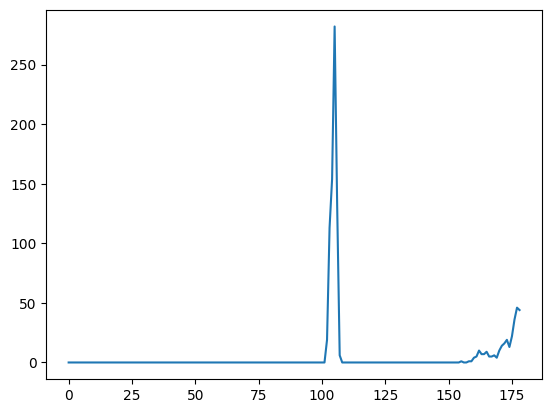

In [26]:
#2. Binarização 

def binarizacao (image, tolerance):
    """
    Função para realizar a binarização da imagem de modo a destacar os objetos presentes na mesma.

    Args:
        -image (np.array): Array da imagem em RGB que representa a imagem a ser binarização.
        -tolerance (int): Tolerância usada para calcular o range da componente Hue da cor de fundo da imagem. 

    Returns:
        -image_objects (np.array): Array da imagem RGB sem fundo.
        -bin_image (np.array): Array da imagem binarizada.
    
    """
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    #Obter a range de cores do fundo
    hist= cv2.calcHist(image_hsv, [0], None, [179], [0,179])
    plt.plot(hist)
    max_hue_idx= np.argmax(hist) #Obter o valor de hue que aparece mais na imagem
    low_hue= np.array([max_hue_idx - tolerance, 0, 0])
    high_hue= np.array([max_hue_idx + tolerance, 255, 255])
    
    #Tirar background da imagem através dos ranges de hue dados
    background_mask= cv2.inRange(image_hsv, low_hue, high_hue)
    inverted_mask= 255 - background_mask
    image_objects= cv2.bitwise_and(image, image, mask=inverted_mask)
    
    image_gs= cv2.cvtColor(image_objects, cv2.COLOR_BGR2GRAY)
    thresh, tresh_img= cv2.threshold(image_gs, 0, 255, cv2.THRESH_OTSU)
    bin_image= cv2.cvtColor(tresh_img, cv2.COLOR_GRAY2BGR)

    return image_objects, bin_image

image_objects, bin_image= binarizacao(image, 20)
showImages([image_objects, bin_image], ["Imagem sem background", "Imagem Binarizada"])


In [ ]:
#3. melhoramento da imagem

kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
image_opt = cv2.morphologyEx(tresh_img, cv2.MORPH_CLOSE, kernel_close)
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
image_opt = cv2.morphologyEx(image_opt, cv2.MORPH_OPEN, kernel_open, iterations=2)
showImages([image_opt], ["Imagem apos melhoramento"])

In [24]:
# Extração de componentes conexos

# contours = cv2.findContours(image_opt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours

In [ ]:
#Extração de de propriedades

